## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import *
from sklearn.metrics import confusion_matrix, f1_score,plot_confusion_matrix 
import warnings
warnings.filterwarnings("ignore")

C:\Users\chasm\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\chasm\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\chasm\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\chasm\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be remove

## Importing Train & Test Dataset

In [2]:
train_df = pd.read_csv(r"C:/Users/chasm/Downloads/train.csv")
test_df = pd.read_csv(r"C:/Users/chasm/Downloads/test.csv")

In [3]:
train_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,54180,951.753,388.728347,178.948203,2.172295,0.887741,55014,262.648279,0.580210,0.984840,0.751624,0.675660,0.007175,0.000922,0.456517,0.991689,HOROZ
1,42023,746.715,272.962686,196.334047,1.390297,0.694730,42365,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,DERMASON
2,38600,716.517,254.129288,193.991641,1.310001,0.645976,38940,221.691331,0.715265,0.991269,0.944809,0.872356,0.006584,0.002352,0.761006,0.996919,SEKER
3,62298,992.583,327.685094,242.658033,1.350399,0.672032,63353,281.638558,0.801157,0.983347,0.794603,0.859479,0.005260,0.001771,0.738705,0.997546,BARBUNYA
4,74456,1085.466,447.665972,212.382328,2.107831,0.880298,75096,307.896612,0.788821,0.991478,0.794104,0.687782,0.006012,0.000830,0.473044,0.997097,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,55381,914.969,363.142352,194.498350,1.867072,0.844473,55974,265.543366,0.765216,0.989406,0.831300,0.731238,0.006557,0.001156,0.534709,0.998339,HOROZ
9524,40987,749.125,272.565043,192.210719,1.418053,0.709016,41441,228.443142,0.708701,0.989045,0.917799,0.838123,0.006650,0.002024,0.702451,0.996113,SIRA
9525,32168,663.090,239.983107,171.160719,1.402092,0.700940,32570,202.379766,0.727536,0.987657,0.919367,0.843308,0.007460,0.002327,0.711169,0.997125,DERMASON
9526,53228,920.083,380.325304,178.969940,2.125079,0.882362,53905,260.330549,0.653939,0.987441,0.790125,0.684494,0.007145,0.000968,0.468533,0.995669,HOROZ


In [4]:
# To check if there is any null value present in the training dataset
train_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
# Checking if there is any null value present in testing dataset
test_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
# Statistical Description of numerical columns of dataset
train_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000,9528.000000
mean,53255.524664,856.676016,320.572294,202.687297,1.582178,0.750259,53975.731423,253.496647,0.750049,0.987197,0.873459,0.800216,0.006551,0.001716,0.644190,0.995117
std,29609.257209,215.627112,86.225872,45.235551,0.247600,0.092649,30067.830953,59.555540,0.049182,0.004600,0.059669,0.062001,0.001129,0.000597,0.099502,0.004259
min,20464.000000,524.736000,183.965251,122.512653,1.036423,0.262774,20772.000000,161.417391,0.555315,0.919246,0.556766,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36453.750000,704.791500,253.499188,176.261896,1.430546,0.715089,36844.750000,215.439913,0.719528,0.985704,0.832908,0.762764,0.005899,0.001154,0.581809,0.993739
50%,44754.500000,796.506000,297.211791,192.789907,1.549658,0.763926,45290.500000,238.711540,0.760305,0.988315,0.883106,0.801603,0.006632,0.001695,0.642568,0.996396
75%,61444.750000,977.826000,376.865074,217.042845,1.706178,0.810235,62391.000000,279.703209,0.787088,0.990065,0.917196,0.834551,0.007256,0.002172,0.696476,0.997909
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994213,0.990685,0.981611,0.010451,0.003665,0.963560,0.999733


## Exploratory Data Analysis and Data Pre-processing

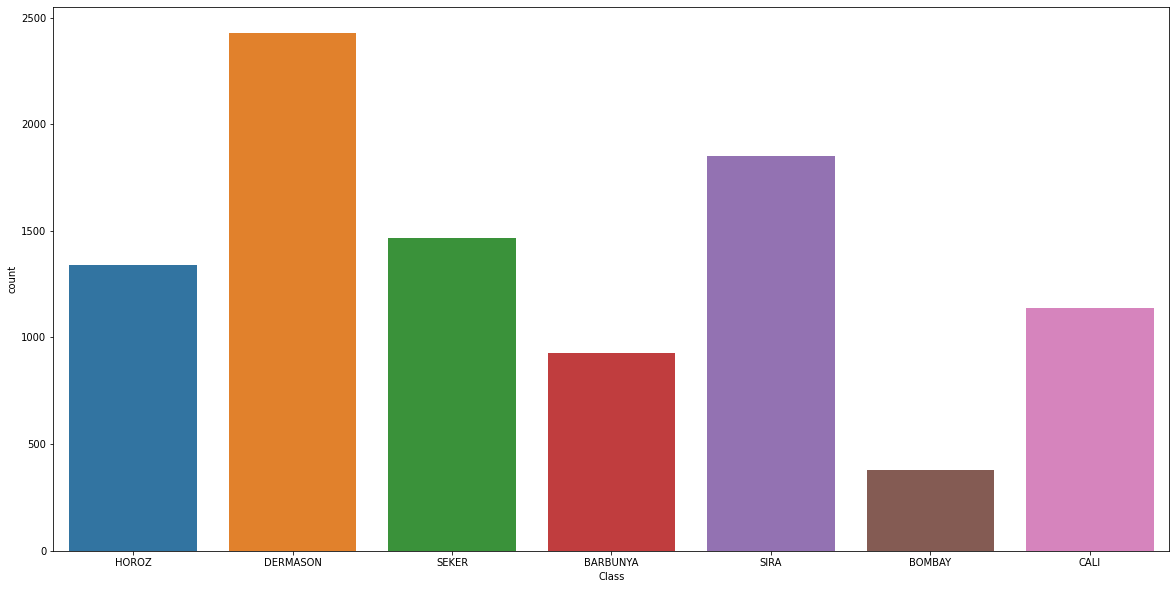

In [7]:
# Countplot of every type of beans
plt.figure(figsize=(20,10))
sns.countplot(train_df["Class"]);

In [8]:
# Function to check the dristibution (spread) of every column in the training dataset
def check_distribution(train_df):
    '''
    This function is to check the distribution of each and every column in the dataset.
    To initialize this function required dataframe should be passed
    '''
    sns.set_style("whitegrid")
    for col in train_df.columns:
        if col != 'Class':
            fig = plt.figure(figsize=(4,4))
            sns.distplot(train_df[col],bins=30, kde=True)
        plt.show()

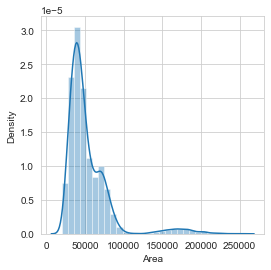

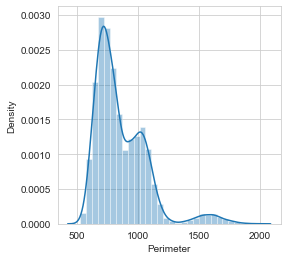

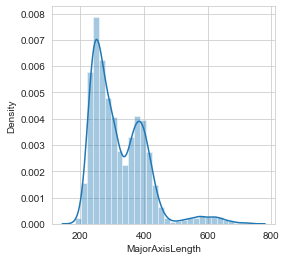

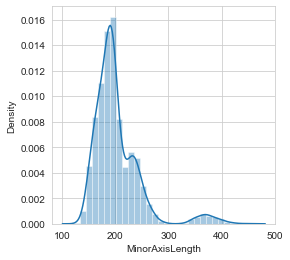

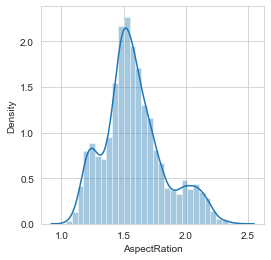

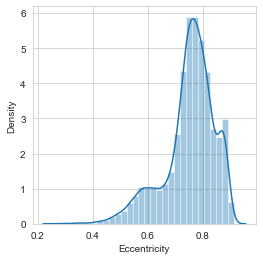

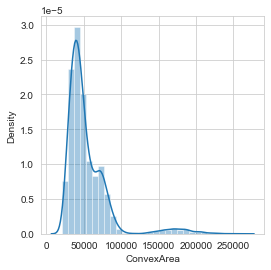

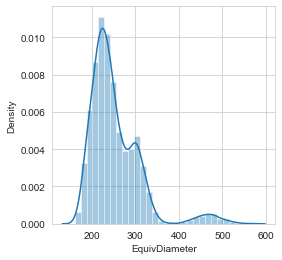

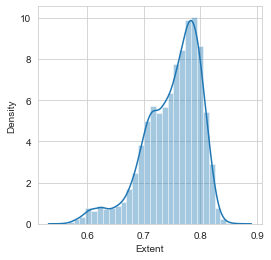

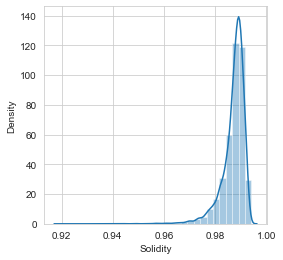

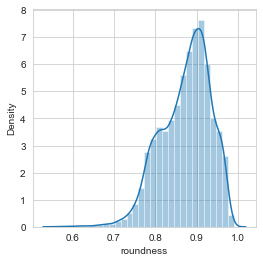

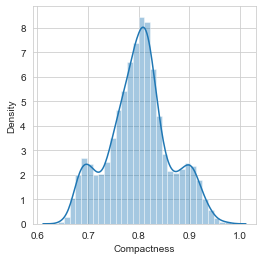

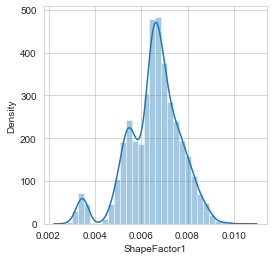

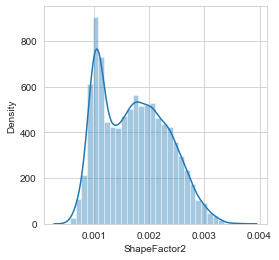

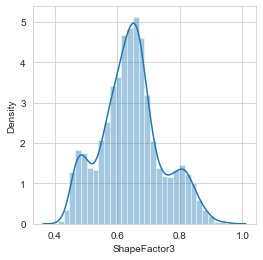

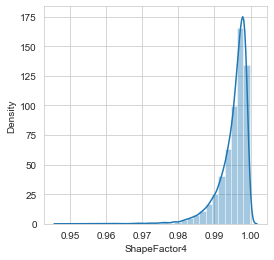

In [9]:
# Calling the distribution function
check_distribution(train_df)

In [10]:
# Function to check the outliers 
def check_outliers(train_df):
    '''
    This function is to check the outliers in each and every column in the dataset.
    To initialize this function required dataframe should be passed
    '''
    sns.set_style("whitegrid")
    for col in train_df.columns:
        if col != 'Class':
            fig = plt.figure(figsize=(4,4))
            sns.boxplot(x = 'Class', y = col , data = train_df)
            plt.show()

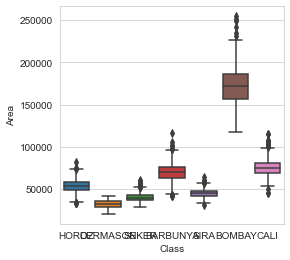

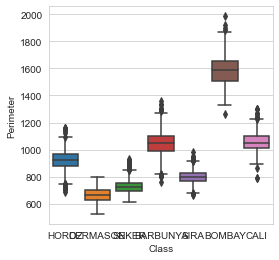

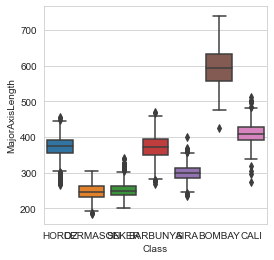

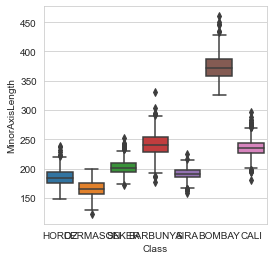

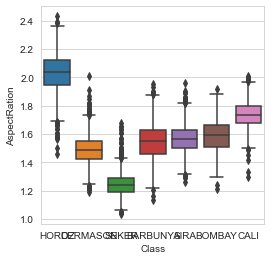

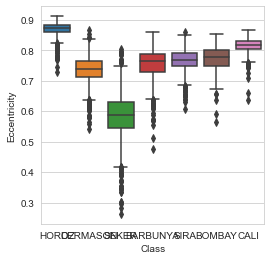

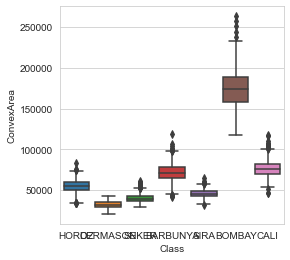

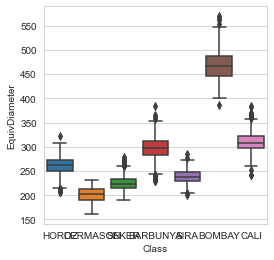

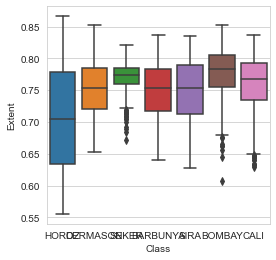

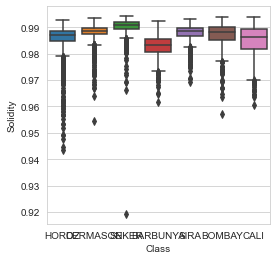

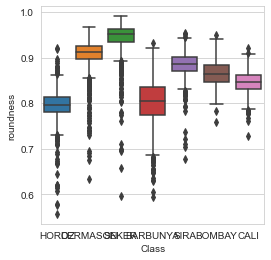

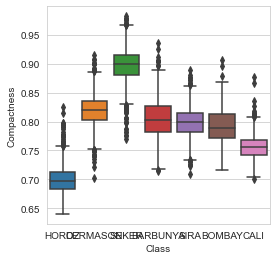

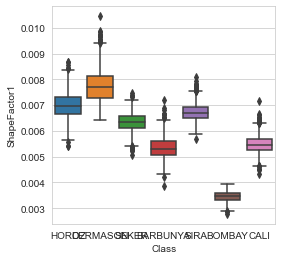

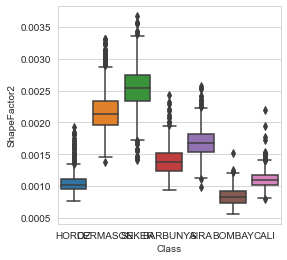

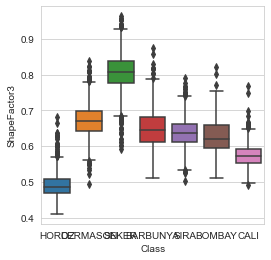

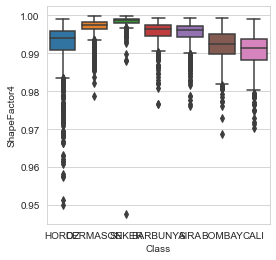

In [11]:
check_outliers(train_df)

In [12]:
# Correlation Matrix to check multicollinearity among columns in the given dataset. 
corr_matrix = train_df.corr()
corr_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.967067,0.932647,0.951510,0.241198,0.268227,0.999939,0.985174,0.057236,-0.201371,-0.356413,-0.268024,-0.847479,-0.638248,-0.272262,-0.363028
Perimeter,0.967067,1.000000,0.977519,0.913352,0.384074,0.390953,0.967977,0.991389,-0.017613,-0.307114,-0.545912,-0.405933,-0.863464,-0.765969,-0.407635,-0.435669
MajorAxisLength,0.932647,0.977519,1.000000,0.826705,0.548498,0.541411,0.933369,0.961919,-0.075414,-0.288195,-0.595111,-0.566929,-0.772233,-0.857623,-0.566888,-0.490086
MinorAxisLength,0.951510,0.913352,0.826705,1.000000,-0.010273,0.019971,0.951213,0.948695,0.151984,-0.158346,-0.208251,-0.014397,-0.947409,-0.469520,-0.018844,-0.266715
AspectRation,0.241198,0.384074,0.548498,-0.010273,1.000000,0.924244,0.242725,0.302166,-0.376240,-0.271328,-0.769326,-0.987666,0.028799,-0.838202,-0.978548,-0.457876
Eccentricity,0.268227,0.390953,0.541411,0.019971,0.924244,1.000000,0.269937,0.318628,-0.319721,-0.299693,-0.723094,-0.970374,0.022529,-0.861501,-0.981115,-0.457891
ConvexArea,0.999939,0.967977,0.933369,0.951213,0.242725,0.269937,1.000000,0.985389,0.055513,-0.210858,-0.360840,-0.269820,-0.847389,-0.639726,-0.274078,-0.369200
EquivDiameter,0.985174,0.991389,0.961919,0.948695,0.302166,0.318628,0.985389,1.000000,0.032889,-0.235186,-0.434206,-0.326616,-0.891872,-0.711286,-0.329530,-0.398492
Extent,0.057236,-0.017613,-0.075414,0.151984,-0.376240,-0.319721,0.055513,0.032889,1.000000,0.185444,0.348527,0.357419,-0.151456,0.236200,0.350056,0.141520
Solidity,-0.201371,-0.307114,-0.288195,-0.158346,-0.271328,-0.299693,-0.210858,-0.235186,0.185444,1.000000,0.606284,0.306140,0.153549,0.346138,0.309851,0.699707


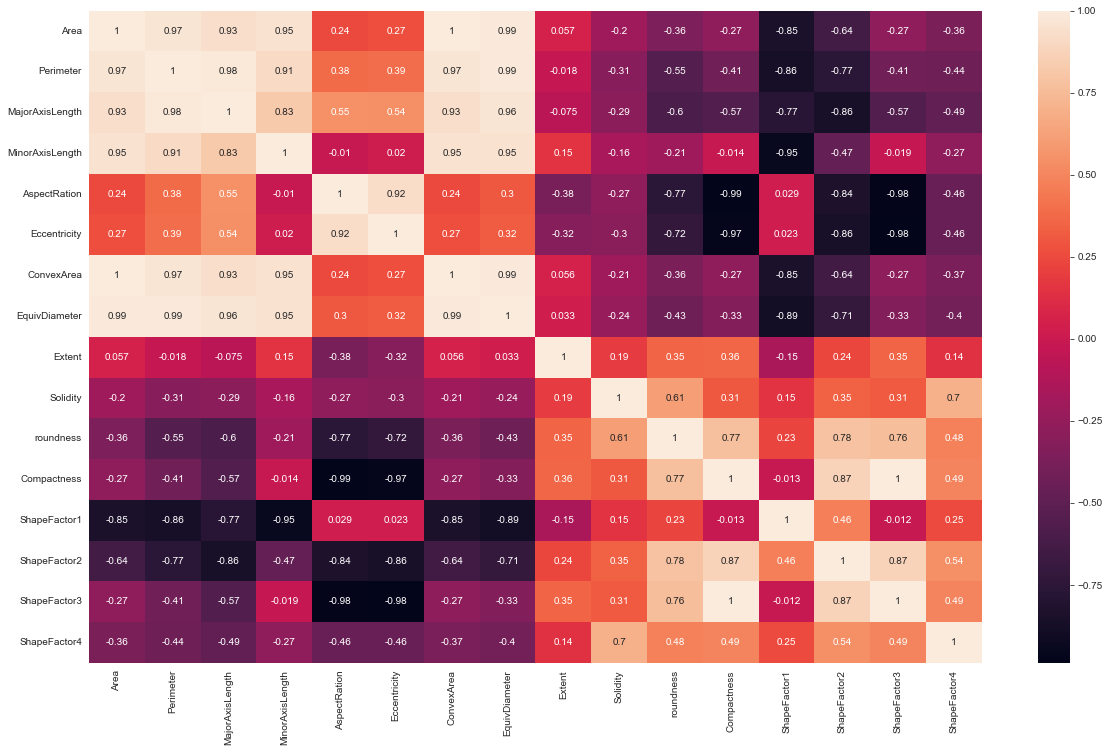

In [13]:
# Plotting the heatmap of correlation matrix for better visualization. 
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,annot=True);

In [14]:
# Function to remove the outliers from the required columns in the dataset 
def remove_outliers(train_df):
    '''
    This function is to remove the outliers in a dataset.
    To initialize this function required dataframe should be passed'''
    for col in train_df.columns:
        if col != 'Class':
            q25 = np.percentile(train_df[col] , 25)
            q75 = np.percentile(train_df[col] , 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            train_df[col] = train_df[col].clip(upper = up)
            train_df[col] = train_df[col].clip(lower=lo)
remove_outliers(train_df)

In [15]:
# Using LabelEncoder on the target variable to make it numeric, for further processing. 
le = LabelEncoder()
train_df["Class"] = le.fit_transform(train_df["Class"])

## Feature Engineering

In [16]:
# Dropping unnecessary columns to reduce data redundancy because of their high correlation with other columns.
features_dropped = ['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Perimeter','AspectRation']
training_df = train_df.drop(features_dropped , axis = 1)

In [17]:
training_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,Class
0,54180.0,388.728347,178.948203,0.887741,55014.0,0.618188,0.984840,0.751624,0.000922,0.991689,4
1,42023.0,272.962686,196.334047,0.694730,42365.0,0.795348,0.991927,0.947081,0.002066,0.998386,3
2,38600.0,254.129288,193.991641,0.645976,38940.0,0.715265,0.991269,0.944809,0.002352,0.996919,5
3,62298.0,327.685094,242.658033,0.672032,63353.0,0.801157,0.983347,0.794603,0.001771,0.997546,0
4,74456.0,447.665972,212.382328,0.880298,75096.0,0.788821,0.991478,0.794104,0.000830,0.997097,4
...,...,...,...,...,...,...,...,...,...,...,...
9523,55381.0,363.142352,194.498350,0.844473,55974.0,0.765216,0.989406,0.831300,0.001156,0.998339,4
9524,40987.0,272.565043,192.210719,0.709016,41441.0,0.708701,0.989045,0.917799,0.002024,0.996113,6
9525,32168.0,239.983107,171.160719,0.700940,32570.0,0.727536,0.987657,0.919367,0.002327,0.997125,3
9526,53228.0,380.325304,178.969940,0.882362,53905.0,0.653939,0.987441,0.790125,0.000968,0.995669,4


In [18]:
# Assigning independent and dependent features from main dataframe.
train_x = training_df.drop(columns="Class")
train_y = training_df["Class"]

In [19]:
# Scaling the training dataframe to bring all the values within the same range.
scaler = StandardScaler()
scaled_df = scaler.fit_transform(train_x)
scaled_df = pd.DataFrame(scaled_df)
scaled_df

,0,1,2,3,4,5,6,7,8,9
0,0.206703,0.864753,-0.608875,1.597338,0.209685,-2.754333,-0.744483,-2.083229,-1.329201,-1.129388
1,-0.438705,-0.569874,-0.077201,-0.700567,-0.448550,0.935294,1.245683,1.250601,0.586605,0.914994
2,-0.620430,-0.803267,-0.148834,-1.281015,-0.626782,-0.732550,1.060715,1.211852,1.065112,0.467142
3,0.637683,0.108274,1.339426,-0.970798,0.643633,1.056287,-1.163726,-1.350144,0.091367,0.658646
4,1.283144,1.595138,0.413569,1.508719,1.254721,0.799357,1.119393,-1.358667,-1.484020,0.521579
...,...,...,...,...,...,...,...,...,...,...
9523,0.270463,0.547679,-0.133338,1.082205,0.259642,0.307759,0.537604,-0.724220,-0.937119,0.900829
9524,-0.493706,-0.574801,-0.203296,-0.530481,-0.496633,-0.869264,0.436193,0.751144,0.516084,0.221120
9525,-0.961902,-0.978573,-0.847022,-0.626629,-0.958267,-0.476993,0.046613,0.777896,1.024138,0.530021
9526,0.156162,0.760618,-0.608210,1.533297,0.151974,-2.009766,-0.014179,-1.426521,-1.253510,0.085627


In [20]:
# Assigning original names of the columns to the scaled data.
cols = ['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent',
       'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4']
scaled_df.columns = cols

In [21]:
scaled_df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,0.206703,0.864753,-0.608875,1.597338,0.209685,-2.754333,-0.744483,-2.083229,-1.329201,-1.129388
1,-0.438705,-0.569874,-0.077201,-0.700567,-0.448550,0.935294,1.245683,1.250601,0.586605,0.914994
2,-0.620430,-0.803267,-0.148834,-1.281015,-0.626782,-0.732550,1.060715,1.211852,1.065112,0.467142
3,0.637683,0.108274,1.339426,-0.970798,0.643633,1.056287,-1.163726,-1.350144,0.091367,0.658646
4,1.283144,1.595138,0.413569,1.508719,1.254721,0.799357,1.119393,-1.358667,-1.484020,0.521579
...,...,...,...,...,...,...,...,...,...,...
9523,0.270463,0.547679,-0.133338,1.082205,0.259642,0.307759,0.537604,-0.724220,-0.937119,0.900829
9524,-0.493706,-0.574801,-0.203296,-0.530481,-0.496633,-0.869264,0.436193,0.751144,0.516084,0.221120
9525,-0.961902,-0.978573,-0.847022,-0.626629,-0.958267,-0.476993,0.046613,0.777896,1.024138,0.530021
9526,0.156162,0.760618,-0.608210,1.533297,0.151974,-2.009766,-0.014179,-1.426521,-1.253510,0.085627


In [22]:
# Splitting original data into training and validation for precise prediction
X_train, X_val, y_train, y_val = train_test_split(train_x,train_y,test_size=0.15,random_state=4)

## Model Building

#### DECISION TREE

Train F1_Score:  1.0
Val F1_Score:  0.8881118881118881


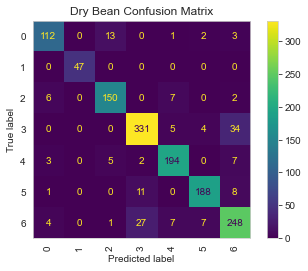

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, dt.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, dt.predict(X_val), average='micro'))

# Displaying Result in Confusion Matrix
plot_confusion_matrix(dt, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

#### BAGGING CLASSIFIER 

Train F1_Score:  0.987033835514942
Val F1_Score:  0.8993006993006993


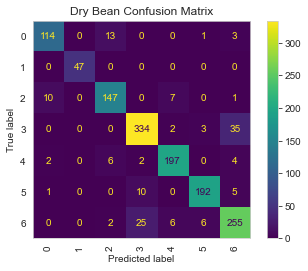

In [24]:
bg = BaggingClassifier(dt, n_estimators=5)
bg.fit(X_train,y_train)
bg.score(X_train,y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, bg.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, bg.predict(X_val), average='micro'))

# Displaying Result in Confusion Matrix
plot_confusion_matrix(bg, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

#### RANDOM FOREST

Train F1_Score:  0.9882687083230427
Val F1_Score:  0.9062937062937063


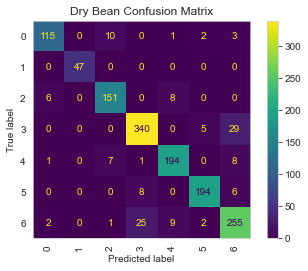

In [25]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, rf.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, rf.predict(X_val), average='micro'))

# Displaying Result in Confusion Matrix
plot_confusion_matrix(rf, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

#### LOGISTIC REGRESSION

In [26]:
lr = LogisticRegression()

#### GRADIET BOOSTING 

Train F1_Score:  0.9979007162262287
Val F1_Score:  0.9174825174825174


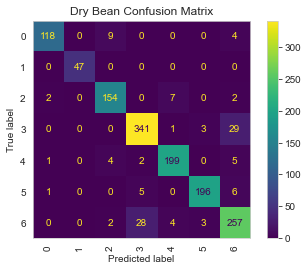

In [27]:
gradb = GradientBoostingClassifier(random_state=42, max_depth=4, learning_rate=0.15)

gradb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, gradb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, gradb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(gradb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

#### MULTI-LAYER PERCEPTRON CLASSIFIER

Train F1_Score:  0.3777475919980242
Val F1_Score:  0.38461538461538464


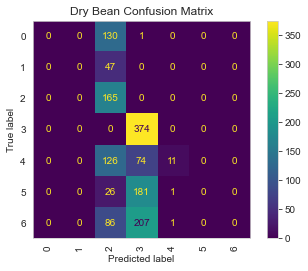

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='constant', max_iter=500,
              solver='adam' , alpha = 0.05)
mlp.fit(X_train , y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, mlp.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, mlp.predict(X_val), average='micro'))

# Displaying Result in Confusion Matrix
plot_confusion_matrix(mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

#### LIGHT GRADIENT BOOSTED MACHINE CLASSIFIER

Train F1_Score:  0.9529513460113608
Val F1_Score:  0.9202797202797203


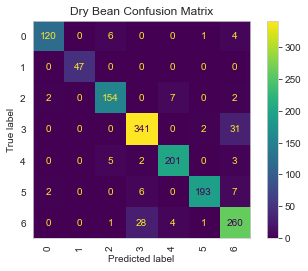

In [29]:
lgb = lgb.LGBMClassifier(random_state=42,silent=True,subsample=0.8, reg_lambda=0.1,reg_alpha=1, num_leaves=5, 
                             n_estimators=100, min_child_samples=5, max_depth=5, learning_rate=0.12, 
                             colsample_bytree=0.5, boosting_type='goss', metric='multi_error', num_class=7)
lgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, lgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, lgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

#### VOTING CLASSIFIER

Train F1_Score:  0.995183996048407
Val F1_Score:  0.9090909090909091


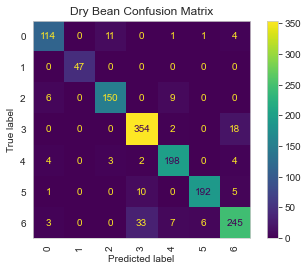

In [30]:
evc = VotingClassifier(estimators=[("lr",lr),("dt",dt),("bg",bg),("rf",rf),("mlp",mlp)],voting="soft")
evc.fit(X_train,y_train)
evc.score(X_train,y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, evc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, evc.predict(X_val), average='micro'))

# Displaying Result in Confusion Matrix 
plot_confusion_matrix(evc, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

## Applying Model on Testing Data  

In [36]:
# Assigning independent and dependent variables from main testing dataframe 
test_x = test_df.drop(columns="Class")
test_y = test_df["Class"]

# Label Encoding dependent variable of the testing dataframe
le.fit_transform(test_y)

# Dropping unnecessary columns from the testing dataset to fit in the model
test_x = test_x.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Perimeter','AspectRation'])

# Scaling the data for better results 
test_scaled = scaler.transform(test_x)
test_x = pd.DataFrame(test_scaled)


cols = ['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent',
       'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4']

test_x.columns = cols

# Predicting dependent variable of testing data.
y_test_pred = evc.predict(test_x)

In [40]:
# Using inverse transform to get the dependent variable data back to its original form.
le.inverse_transform(y_test_pred)

'DERMASON'